Turned off sinks because it seg faults 

But now the rieman problem came back again

Try turning off AMR to see if this would help

Submitted batch job 177245

only one plot file written  though not too sure why 

In [23]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
cd ~/project/FLASH4.3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3/object


/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:701: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:711: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



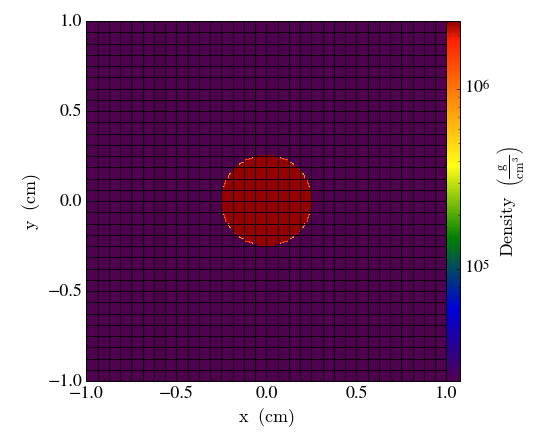

In [3]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

The reason why it ended early was because I only had qsub of 5 minutes not because of changes  to my plot files timesteps 

Going back to AMR but to prevent the error from rieman solver, I increased the cfl from 0.5 to 0.8 to see if it helps alleviate the problem

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:701: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:711: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



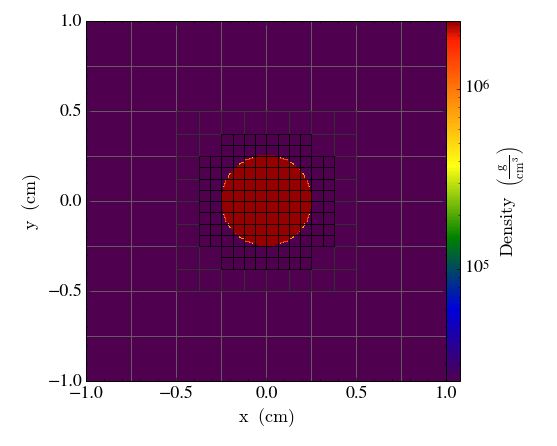

In [3]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()


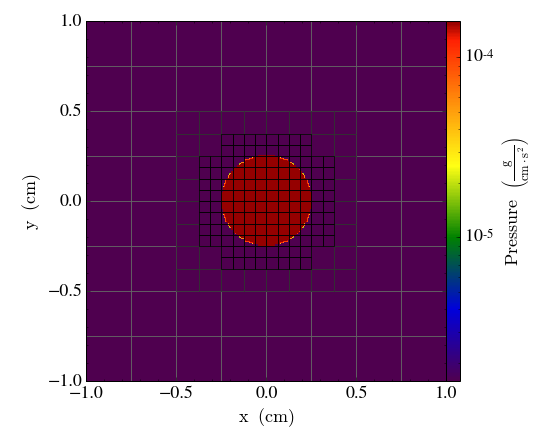

In [4]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

No but it still eventually reached non convergence :q

I thought maybe the pressure problem was due to how the Gamma is setup and maybe I should use Multitemp module, but that seems to be used for  3T plasma formulation, which is  when your different species (electrons, radiation, fluid) have different temperature so they are not refering to regions with different temperature, so I have no idea why this is not working 

I wonder what the difference between that and 

REQUIRES physics/Eos

(found in Sedov) is

Inside Simulation init block, maybe I need to #include "Eos.h"

okay that's already included in my f90 file '

So change to REQUIRES physics/Eos now to see if that helps with the pressure stuff 


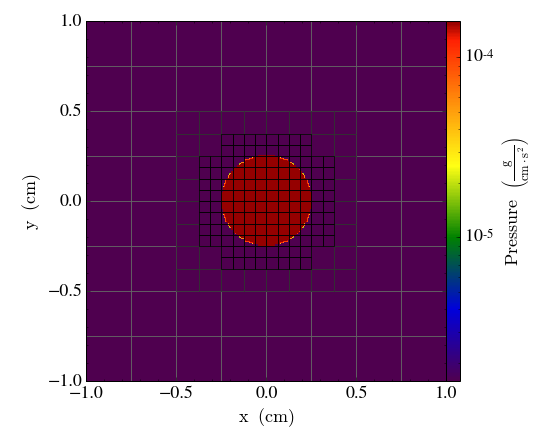

In [5]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()


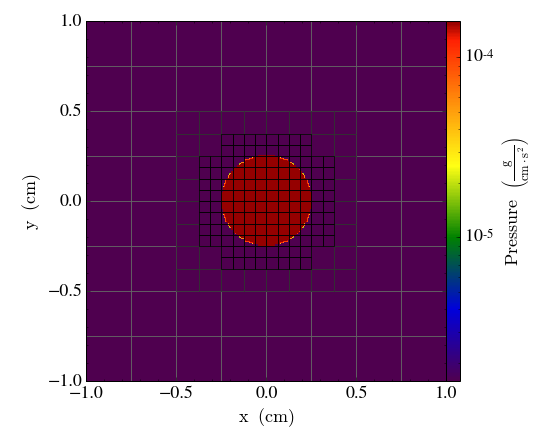

In [6]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()


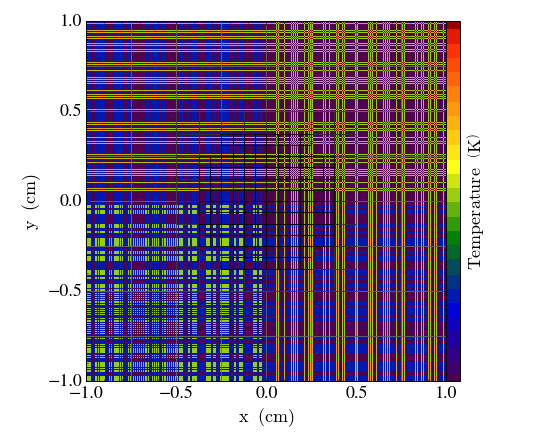

In [7]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

that didn't help either '


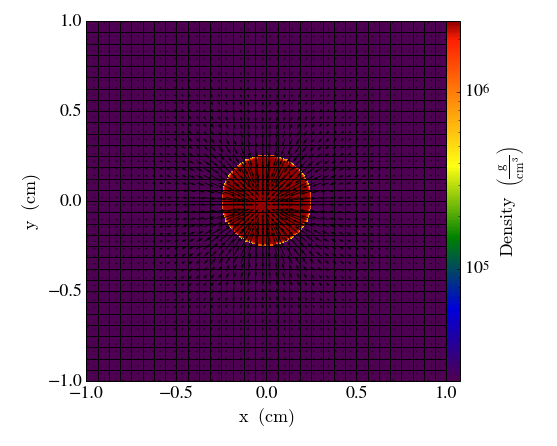

In [11]:
i = 2
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()


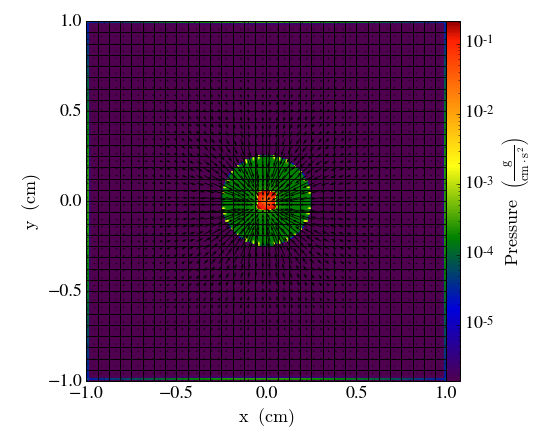

In [10]:
i = 2
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()


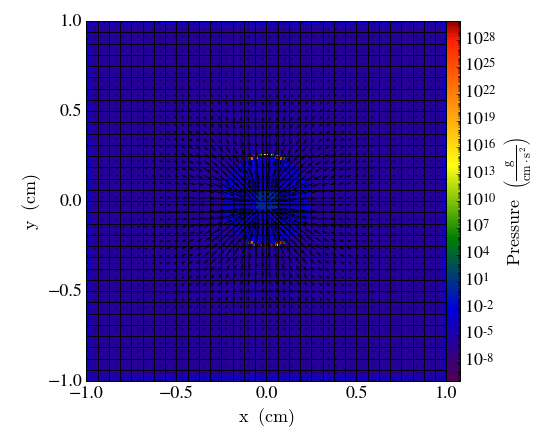

In [9]:
i = 3
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()

Explicitly used temperature definition over determined but still uniform 


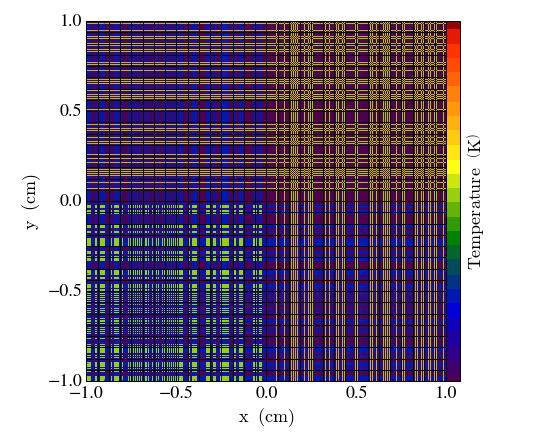

In [12]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.show()


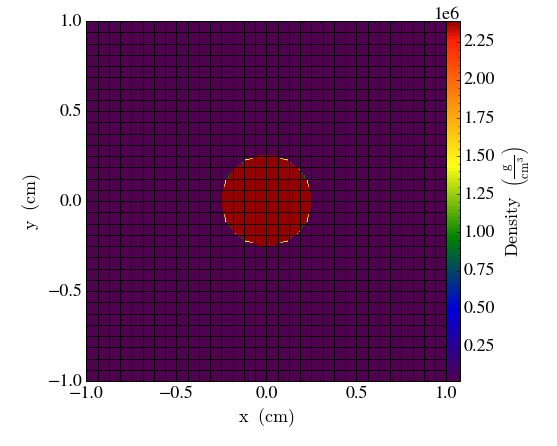

In [21]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.set_log("all", False)
# slc.set_zlim(physical_quantity,2.5e-4,1e-4)
slc.show()


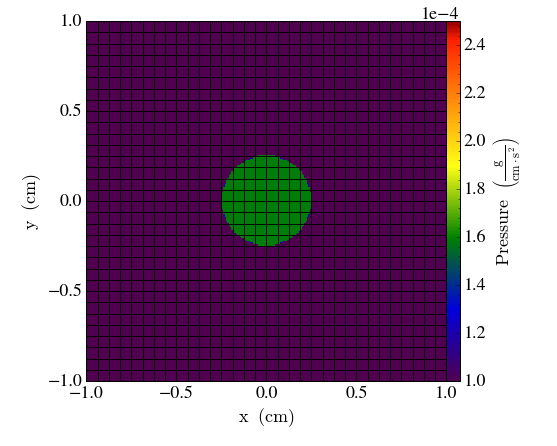

In [19]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.set_log("all", False)
slc.set_zlim(physical_quantity,2.5e-4,1e-4)
slc.show()

In [ ]:
P = 1.6e-4
T = 0.8e-18


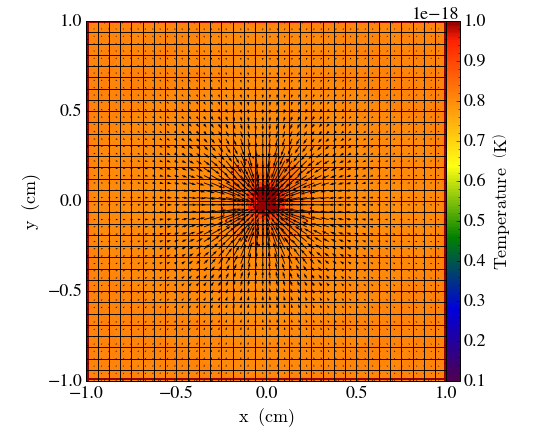

In [17]:
i = 1
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.set_log("all", False)
slc.set_zlim(physical_quantity,1e-18,1e-19)
slc.show()

- AMR crash try a lower CFL to 0.3 

Changed to add in "gamma" in flash.par 


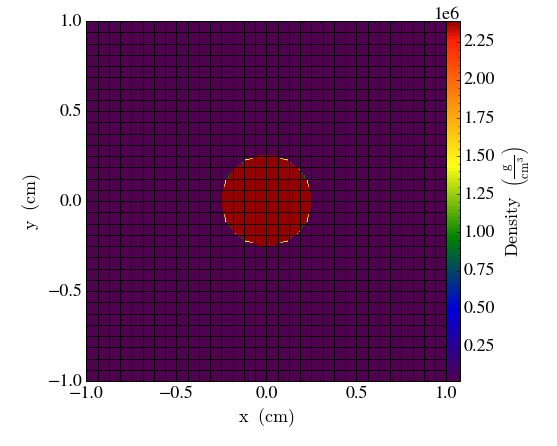

In [22]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
slc.set_log("all", False)
# slc.set_zlim(physical_quantity,2.5e-4,1e-4)
slc.show()


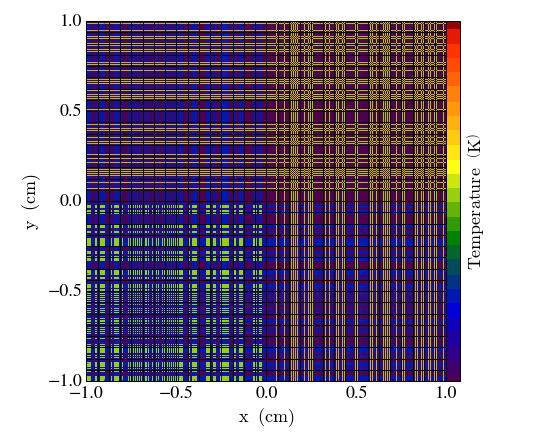

In [24]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
# slc.set_zlim(physical_quantity,1e-18,1e-19)
slc.show()


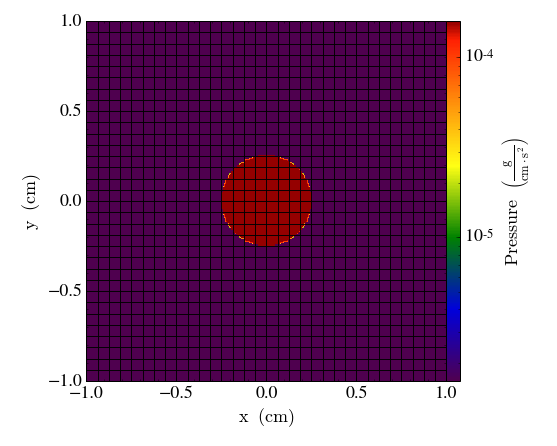

In [28]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
# slc.set_zlim(physical_quantity,2.5e-4,1e-4)
slc.show()


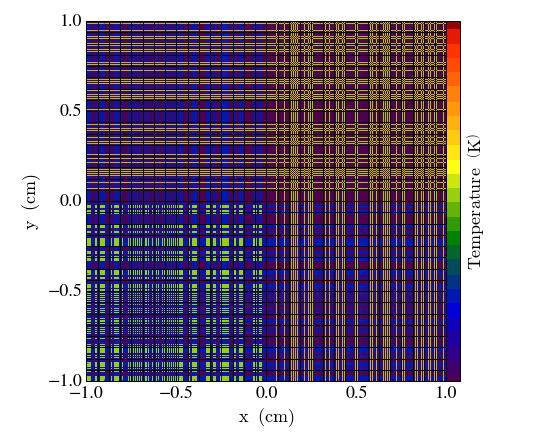

In [30]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
# slc.set_zlim(physical_quantity,1e-18,1e-19)
slc.show()

removing all the relations to sim_gamma, no if defs for EINT or GAMMAE 


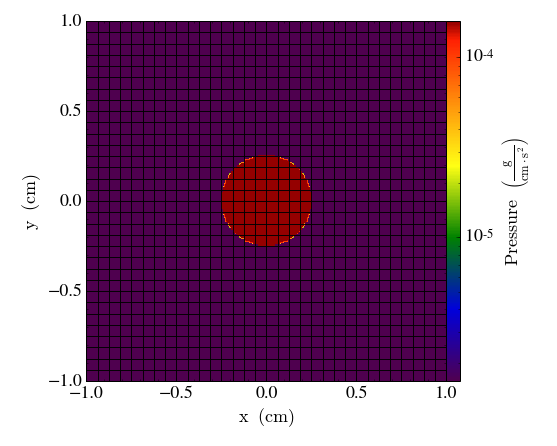

In [31]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
# slc.set_zlim(physical_quantity,2.5e-4,1e-4)
slc.show()


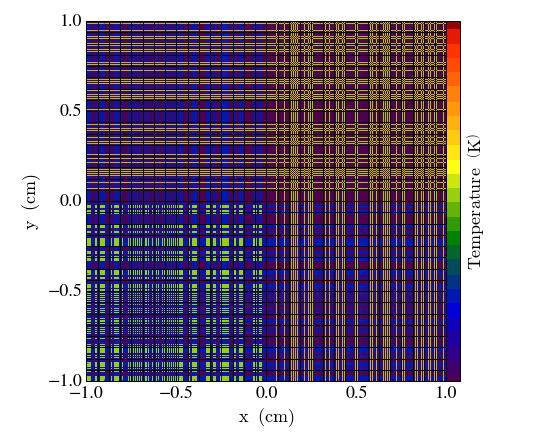

In [32]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
# slc.set_zlim(physical_quantity,1e-18,1e-19)
slc.show()

In [1]:
%pylab inline
import h5py

Populating the interactive namespace from numpy and matplotlib


In [27]:
i = 0 
f = h5py.File("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))

In [28]:
f

<HDF5 file "uniform_sphere_hdf5_chk_0000" (mode r)>

In [31]:
dset = f.create_dataset("ds2", (100,100), dtype='float')

ValueError: Unable to create dataset (No write intent on file)

In [ ]:
dset.shape

In [ ]:
np.where(dset>0)

In [ ]:
dset[:100]

In [ ]:
np.where(dset[0]>0)

In [16]:
import yt 


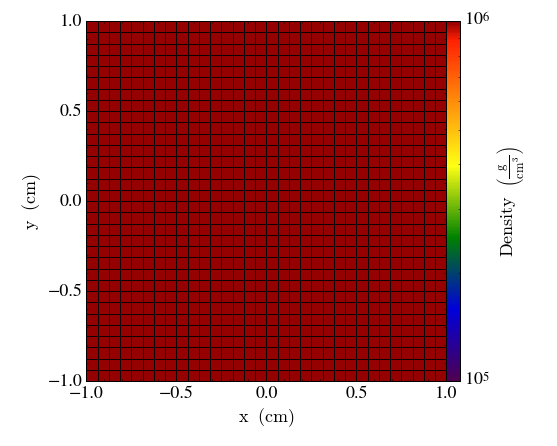

In [32]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_0000")
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
slc.set_zlim("all",1e5,1e6)
slc.show()


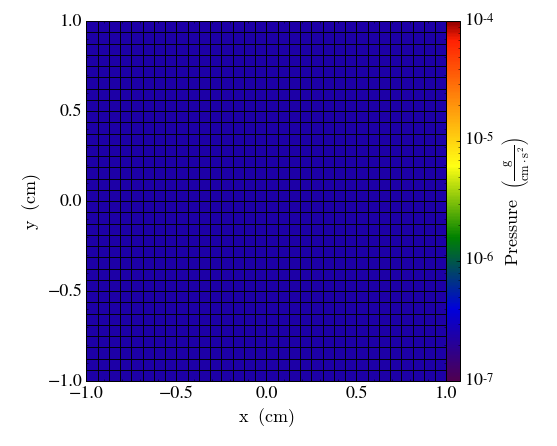

In [48]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="pressure"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
# slc.set_zlim(physical_quantity,2.5e-4,1e-4)
slc.set_zlim("all",1e-4,1e-7)
slc.show()



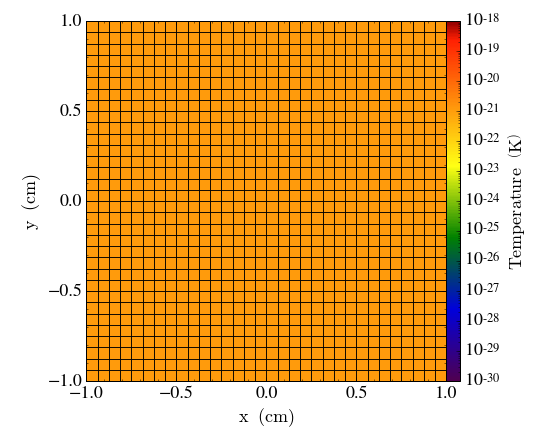

In [42]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity="temperature"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
slc.set_zlim(physical_quantity,1e-18,1e-30)
slc.show()

In [44]:
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))

In [45]:
ds.field_list

[('flash', u'dens'),
 ('flash', u'eint'),
 ('flash', u'ener'),
 ('flash', u'gamc'),
 ('flash', u'game'),
 ('flash', u'gpol'),
 ('flash', u'gpot'),
 ('flash', u'pres'),
 ('flash', u'temp'),
 ('flash', u'velx'),
 ('flash', u'vely'),
 ('flash', u'velz')]


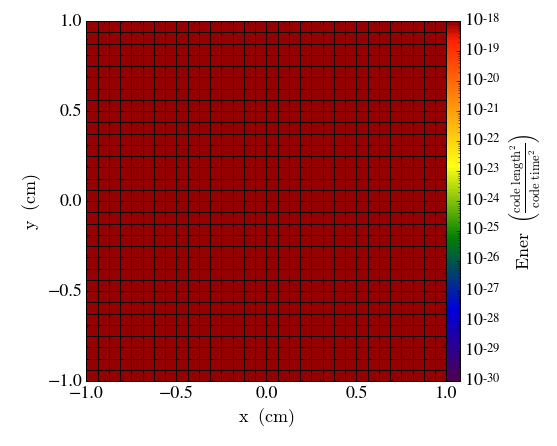

In [49]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity='ener'
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
slc.set_zlim(physical_quantity,1e-18,1e-30)
slc.show()


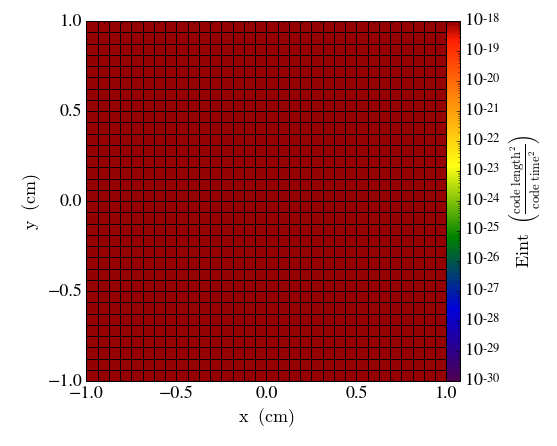

In [46]:
i = 0
ds = yt.load("uniform_sphere_hdf5_chk_{}".format(str(i).zfill(4)))
physical_quantity='eint'
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.annotate_velocity()
slc.annotate_grids()
# slc.set_log("all", False)
slc.set_zlim(physical_quantity,1e-18,1e-30)
slc.show()